## Sathwik Assignment-4

In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error 


import warnings
warnings.filterwarnings('ignore')

In [19]:
data = pd.read_csv('delivery_time.csv')

In [20]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [21]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


##  Making Necessary EDA For The Model

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [23]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [24]:
data.shape

(21, 2)

In [25]:
data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [26]:
data[data.duplicated(keep = False)]

,Delivery Time,Sorting Time


In [27]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [28]:
data.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [29]:
data.rename(columns={'Delivery Time':'d','Sorting Time':'s'},inplace=True)

In [30]:
data.head()

,d,s
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:xlabel='Sorting Time', ylabel='frequency'>

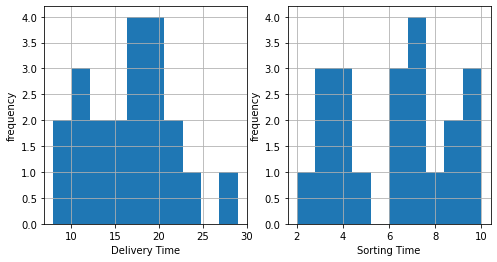

In [35]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
plt.xlabel('Delivery Time')
plt.ylabel('frequency')
data['d'].hist()

plt.subplot(1,2,2)
plt.xlabel('Sorting Time')
plt.ylabel('frequency')
data['s'].hist()

<AxesSubplot:xlabel='s', ylabel='Density'>

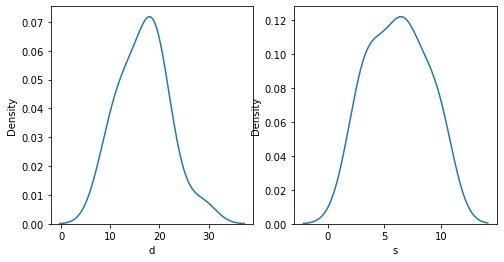

In [36]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.kdeplot(data['d'])
plt.subplot(1,2,2)
sns.kdeplot(data['s'])


####  Building Various Models

##### Model1:Building The Model without applying any transformation

In [37]:
model1 = smf.ols('d~s',data=data).fit()

<AxesSubplot:xlabel='s', ylabel='d'>

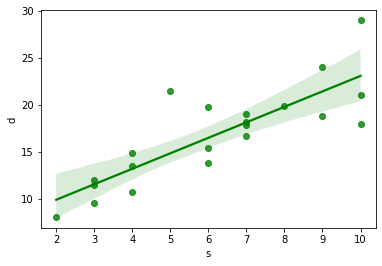

In [38]:
sns.regplot(x='s',y='d',data=data, color='green')

In [39]:
model1.params

Intercept    6.582734
s            1.649020
dtype: float64

In [40]:
print(model1.tvalues, '\n', model1.pvalues)

Intercept    3.823349
s            6.387447
dtype: float64 
 Intercept    0.001147
s            0.000004
dtype: float64


In [41]:
(model1.rsquared,model1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [42]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        20:26:09   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
s              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
pred = model1.predict(data.s)
pred.head()

0    23.072933
1    13.178814
2    16.476853
3    21.423913
4    23.072933
dtype: float64

In [46]:
actual_data = data.d
actual_data

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: d, dtype: float64

In [54]:
from sklearn.metrics import mean_squared_error
from math import sqrt
root = sqrt(mean_squared_error(pred,actual_data))
root

2.7916503270617654

In [55]:
model2 = smf.ols('d~np.log(s)',data=data).fit()

In [56]:
model2.params

Intercept    1.159684
np.log(s)    9.043413
dtype: float64

In [57]:
print(model2.tvalues, '\n', model2.pvalues)

Intercept    0.472460
np.log(s)    6.586789
dtype: float64 
 Intercept    0.641980
np.log(s)    0.000003
dtype: float64


In [58]:
(model2.rsquared,model2.rsquared_adj)

(0.6954434611324223, 0.6794141696130761)

In [59]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           2.64e-06
Time:                        21:39:20   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(s)      9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
pred2 = model2.predict(data.s)
pred2.head()

0    21.982913
1    13.696517
2    17.363305
3    21.030094
4    21.982913
dtype: float64

In [61]:
root2 = sqrt(mean_squared_error(pred2,actual_data))
root2

2.733171476682066

In [62]:
model3 = smf.ols('d~np.exp(s)',data=data).fit()

In [63]:
model3.params

Intercept    15.083578
np.exp(s)     0.000393
dtype: float64

In [64]:
print(model3.tvalues, '\n', model3.pvalues)

Intercept    14.406456
np.exp(s)     3.277108
dtype: float64 
 Intercept    1.117304e-11
np.exp(s)    3.964511e-03
dtype: float64


In [65]:
(model3.rsquared,model3.rsquared_adj)

(0.361117702270909, 0.3274923181799042)

In [66]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Sat, 15 Jan 2022   Prob (F-statistic):            0.00396
Time:                        21:42:51   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(s)      0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
pred3 = model3.predict(data.s)
pred3.head()

0    23.739082
1    15.105033
2    15.242109
3    18.267760
4    23.739082
dtype: float64

In [68]:
root3 = sqrt(mean_squared_error(pred3,actual_data))
root3

3.958615702523664

In [69]:
model4 = smf.ols('d~np.reciprocal(s)',data=data).fit()

In [63]:
model4.params

Intercept    15.083578
np.exp(s)     0.000393
dtype: float64

In [70]:
print(model4.tvalues, '\n', model4.pvalues)

Intercept           15.162032
np.reciprocal(s)          NaN
dtype: float64 
 Intercept           1.973651e-12
np.reciprocal(s)             NaN
dtype: float64


In [71]:
(model4.rsquared,model4.rsquared_adj)

(0.0, 0.0)

In [72]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 15 Jan 2022   Prob (F-statistic):                nan
Time:                        21:45:45   Log-Likelihood:                -63.396
No. Observations:                  21   AIC:                             128.8
Df Residuals:                      20   BIC:                             129.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           16.7910      1.107     15.162      0.000      14.481      19.101
np.reciprocal(s)          0          0        nan        nan           0           0
==============================================================================
Omnibus:                        0.864   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.374
Skew:                           0.327   Prob(JB):                        0.829
Kurtosis:                       2.974   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
pred4 = model4.predict(data.s)
pred4.head()

0    16.790952
1    16.790952
2    16.790952
3    16.790952
4    16.790952
dtype: float64

In [74]:
root4 = sqrt(mean_squared_error(pred4,actual_data))
root4

4.95259614917066

In [75]:
model5 = smf.ols('d~np.sqrt(s)',data=data).fit()

In [76]:
model5.params

Intercept    -2.518837
np.sqrt(s)    7.936591
dtype: float64

In [77]:
print(model5.tvalues, '\n', model5.pvalues)

Intercept    -0.840911
np.sqrt(s)    6.592434
dtype: float64 
 Intercept     0.410857
np.sqrt(s)    0.000003
dtype: float64


In [78]:
(model5.rsquared,model5.rsquared_adj)

(0.6958062276308671, 0.6797960290851233)

In [79]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sat, 15 Jan 2022   Prob (F-statistic):           2.61e-06
Time:                        21:47:32   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(s)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
pred5 = model5.predict(data.s)
pred5.head()

0    22.578867
1    13.354345
2    16.921761
3    21.290936
4    22.578867
dtype: float64

In [81]:
root5 = sqrt(mean_squared_error(pred5,actual_data))
root5

2.7315432100912105

## Insights Drawn: 
>By Comparing all the seven models its assured that model5 is better to predict the Delivery Time because the model5 has better Rsquare and Adjusted Rsquare value compared to other models and even the RMSE value is also less.